---
#### Cosas que hacer:
- Ver como hacer para que alguien pueda dibujar un numero y probar la red
- Ver como lograr convertir imagenes para que la red lo entienda
- Entrenarla con los numeros rotados 90°
- Que una de las salidas posibles sea Nan
- Ver como poder hacer para entrenar a la misma red con distintos datasets
- Como usar los IDX3-UBYTE en la red y como pasar los jpg a ese mismo formato
- Porque le erra tanto en las imagenes mias
- Se puede leer un zip desde pandas?
- Dataset o Dataframe
-
- Escribir la cross entropy t la softmax
-
- HACER QUE LOS PESOS Y SESGOS SE GUARDEN EN UNA CARPETA NO EN EL MEDIO DE TODO
-
- Que los graficos ponga en algun lugar las iteraciones, el paso y el batch size
-
- Pasar todo a ingles
-
- Hacer que los archivos tenga lo que le pega a test y train y el numeero
- Porque ahora el test le erra a todo
-
- Hacer el informe y que hable de la impoortancia de normalizar los datos para que la maquina sea capaz de predecir, y tambien de con pequeñas variaciones (como que no este bien centrado) deja inutilizable a la NN y de ahi se puede hablar de verdad absoluta y qcy
-
- I"ve uninstalled 3.12 and install 3.10 and it worked! --> tensor flow no es compatible para la version 3.12 de python por eso no me deja instalarlo...
---

In [9]:
# El codigo este utiliza la libreira sklearn para la red neuronal, asi puedo hacer pruebas de manera mas facil, tambien utiliza OpenML para descargar el dataset MNIST y la red neuronal MLPClassifier

import numpy as np
from sklearn.datasets import fetch_openml # Permite descargar datasets desde OpenML.
from sklearn.model_selection import train_test_split # esto me permite dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.neural_network import MLPClassifier
# (Multi-layer Perceptron Classifier), un tipo de red neuronal de scikit-learn que se usa para clasificación. Esta red neuronal puede aprender a 
# partir de datos etiquetados y ajustar los pesos de sus neuronas en varias capas ocultas.
from sklearn.metrics import accuracy_score # Mide la precisión de un modelo al comparar las predicciones del modelo con las etiquetas reales.

import os
import cv2
import matplotlib.pyplot as plt

# Descargar el dataset MNIST desde OpenML se pone el nombre y la versión

mnist = fetch_openml("mnist_784", version=1)
# Lo guarda en un cache de scikit-learn para que no se descargue de nuevo
# una cosa asi --> C:\Users\<usuario>\scikit_learn_data\openml\openml.org\data\v1\download 

# X Es una matriz donde cada fila representa una imagen y cada (atributo, columna, caracteristica o como se le diga) corresponde a uno de los 784 píxeles de la imagen (28x28 píxeles).
# y contiene las etiquetas o clases (0-9, el número representado por la imagen)
# Ambas tienen 70,000 filas
X, y = mnist["data"], mnist["target"]
# La razón por la que en el código se utiliza mnist["data"] y mnist["target"] tiene que ver con cómo scikit-learn organiza y presenta los datos al cargar un dataset, no con el formato ARFF en si, ya que si lo buscas no vas a encontrar la columna "target"

X = X / 255.0 # Normalizar los datos del 0 al 1 para que no se sature la red y que no de Nan por ejeplo, ademas de que para que los calculos sean mas rapidos

# Se convierte la clase {0,1...9} a un entero que ocupe 8 bits por las dudas
y = y.astype(np.int8)

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# El parámetro random_state es una semilla que se utiliza para generar los números aleatorios de manera reproducible. Al usar un valor fijo como 42, se garantiza que cada vez que ejecutes el código, la división sea la misma.

# Crear el clasificador MLP
# Esta entiende automaticamente que la funcion de la capa de salida es softmax y que tiene que tener 10 salidas ya que hay 10 clases
#mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=80, activation="relu",
#                    solver="sgd", verbose=1, random_state=42,
#                    learning_rate_init=0.02, batch_size=100)

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=2000, activation="relu",
                    solver="sgd", verbose=1, random_state=42,
                    learning_rate_init=0.01, batch_size=4096) #97.50% con batch de 4096 lo mejor que salio

# Este código configura una red neuronal con:
# hidden_layer_sizes: Una sola capa oculta de 64 neuronas.
# max_iter: Máximo de epochs para el entrenamiento.
# activation: la funcion que se usa para la activación de las neuronas de las capas ocultas evidentemente...
# solver: Algoritmo utilizado para optimizar el modelo (Stop-Gradient Descent).
# verbose: cada cuanto imprime un mensaje
# random_state: es la semilla aleatoria que se utiliza
# learning_rate_init: learning rate inicial
# batch_size: batch size...

# Entrenar la red neuronal
mlp.fit(X_train, y_train)
# Esto hace Forward Propagation, Cálculo de Pérdida, Backpropagation y lo repite por la cantidad de epochs

# Realizar predicciones sobre el conjunto de prueba
y_pred = mlp.predict(X_test)
# Esto hace Forward Propagation, osea nada, es ya la red entrenada que la testeas

# Calculo la precision
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Si pone esto "ConvergenceWarning" significa que no encontro un minimo de la funcion cuadratica (Costo) 

Iteration 1, loss = 2.23849462
Iteration 2, loss = 1.97320358
Iteration 3, loss = 1.65352941
Iteration 4, loss = 1.30593706
Iteration 5, loss = 1.00034691
Iteration 6, loss = 0.78780423
Iteration 7, loss = 0.65836685
Iteration 8, loss = 0.57888803
Iteration 9, loss = 0.52657673
Iteration 10, loss = 0.48947468
Iteration 11, loss = 0.46156202
Iteration 12, loss = 0.43966883
Iteration 13, loss = 0.42161745
Iteration 14, loss = 0.40670191
Iteration 15, loss = 0.39381341
Iteration 16, loss = 0.38262237
Iteration 17, loss = 0.37281012
Iteration 18, loss = 0.36396081
Iteration 19, loss = 0.35607415
Iteration 20, loss = 0.34892709
Iteration 21, loss = 0.34243776
Iteration 22, loss = 0.33630590
Iteration 23, loss = 0.33080554
Iteration 24, loss = 0.32561123
Iteration 25, loss = 0.32063673
Iteration 26, loss = 0.31599815
Iteration 27, loss = 0.31168471
Iteration 28, loss = 0.30757816
Iteration 29, loss = 0.30369750
Iteration 30, loss = 0.30000645
Iteration 31, loss = 0.29645601
Iteration 32, los

Prediccion de la imagen: [0]


c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


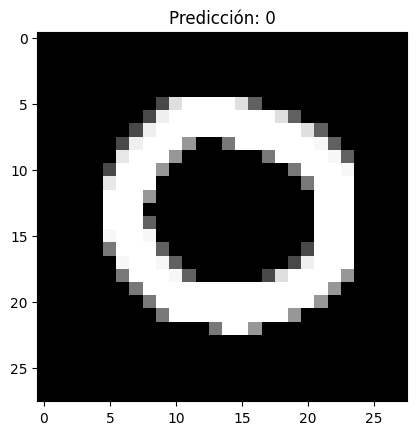

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [1]


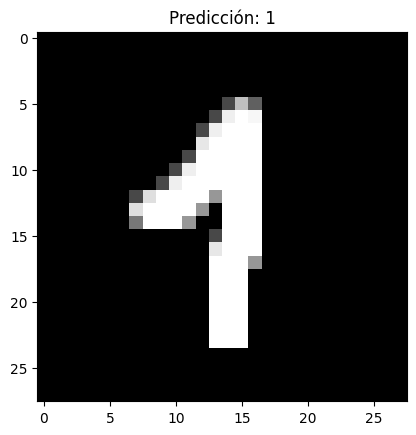

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [2]


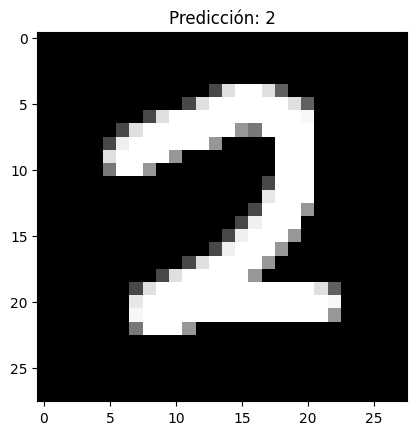

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [3]


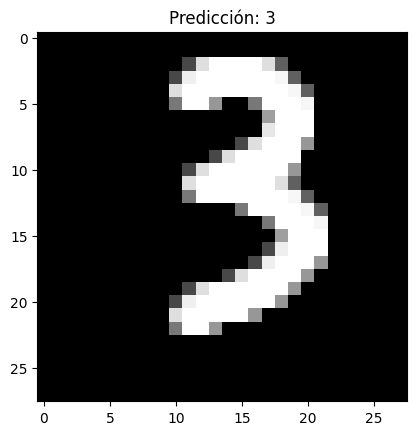

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [4]


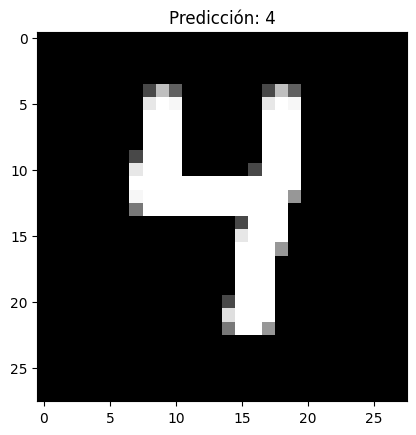

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [5]


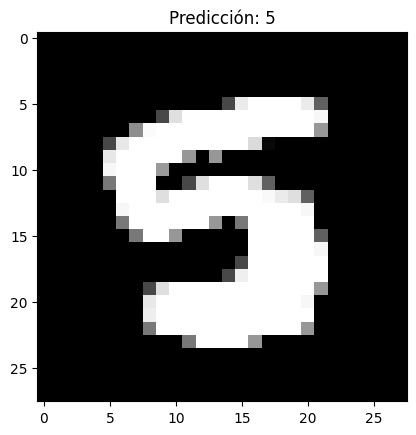

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [6]


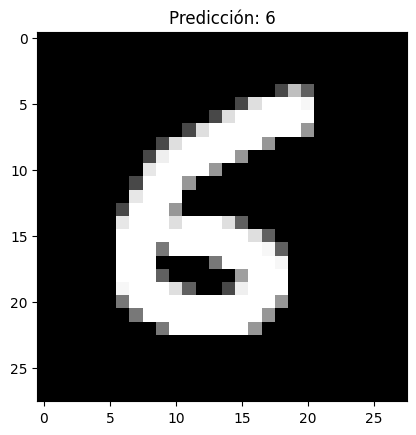

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [7]


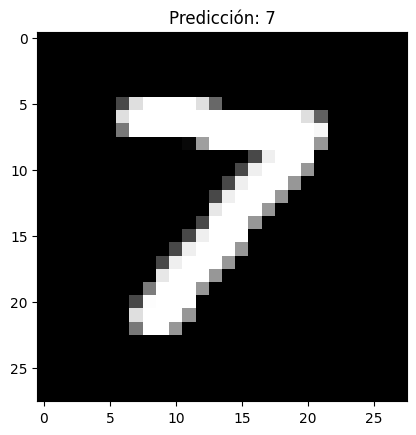

c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Prediccion de la imagen: [8]


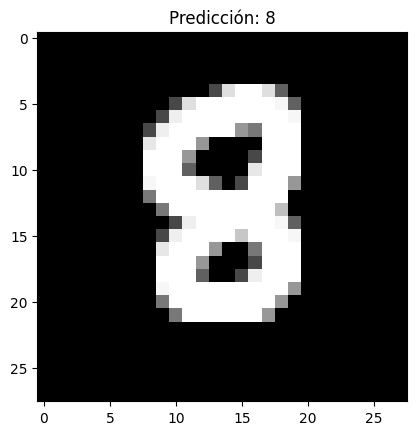

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para preprocesar una imagen (28x28 píxeles, escala de grises)
def preprocesar_imagen(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises, saca los rdb si tiene
    img_resized = cv2.resize(img, (28, 28))  # redimenciono 28x28
    img_resized = img_resized / 255.0  # Normalizo de 0-1
    img_resized = img_resized.flatten()  # Aplanar la imagen a un vector de 784 elementos
    return img_resized

for i in range(9):
    path_imagen = f"digits/digitB{i}.png"
    imagen_procesada = preprocesar_imagen(path_imagen)

    imagen_procesada = imagen_procesada.reshape(1, -1)  # Lo cambio de (784,) a (1, 784) que es la forma correcta

    prediccion = mlp.predict(imagen_procesada)
    print(f"Prediccion de la imagen: {prediccion}")

    # La vuelvo a poner en 28x28 para que el humano vea como lo "ve" la maquina
    plt.imshow(imagen_procesada.reshape(28, 28), cmap="gray")
    plt.title(f"Predicción: {prediccion[0]}")
    plt.show()
    
    
    
# TENES QUE CENTRAR LAS IMAGENES PARA QUE FUNCIONE BIEN PRIORIZA OTRRAS COSAS (estan normalizadas en 20x20 eso ocupan las imagenes y despues se les agrega 4 pixeles en todas las direcciones y llega a 28x28)
#   https://interactivechaos.com/es/manual/tutorial-de-deep-learning/el-dataset-mnist
# Fijate con alguna libreia de pytohn para hacer un display de pantalla para que escriba alguien lo numeros en vez de hacerlo en paint

#im10107 la saque del dataset-frame??
#Sera que no predice biene porque se lo estoy mandando como el orto?
#Cuales son los requisitos para que detecte bien la imagen?
#SERA OVERFITTING QUIZA?


Draw a number and press 'Enter' to predict it.
The image is probably a: 5


c:\Users\Max\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


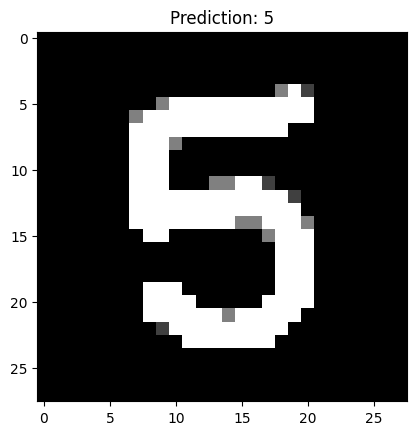

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear una ventana para dibujar
drawing = False  # Controla el estado de dibujo
last_point = None  # Guarda el último punto donde se dibujó

def mouse_callback(event, x, y, flags, param):
    global drawing, last_point
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        last_point = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(canvas, last_point, (x, y), (255, 255, 255), 30)  # Dibuja con un grosor de 30 todo blanco
            last_point = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        last_point = None

# Crear una imagen en negro de 200x200 píxeles
canvas = np.zeros((200, 200), dtype=np.uint8) # uint8 es de 0 a 255 (1 byte)

# Crear una ventana y registrar el callback del mouse
cv2.namedWindow("ventana") # defino la ventana
cv2.setMouseCallback("ventana", mouse_callback) # asocio la ventana con la funcion

print("Draw a number and press 'Enter' to predict it.")

while True:
    cv2.imshow("ventana", canvas) # muestro la ventana
    key = cv2.waitKey(1) & 0xFF # verifica si en ese 1 milisegundo presionaste una tecla, y obtiene su código entre 0 y 255 por eso el FF.
    if key == 13:  # Enter key
        break
    elif key == 27:  # Esc key
        canvas.fill(0)  # Limpiar el lienzo

cv2.destroyAllWindows()

# Preprocesar la imagen dibujada
def preprocesar_imagen(img):
    # Redimensionar la imagen a 20x20 
    img_resized = cv2.resize(img, (20, 20))
    
    # Crear un nuevo lienzo de 28x28 píxeles
    img_with_border = np.zeros((28, 28), dtype=np.uint8)
    
    # Pngo la imagen redimensionada en el centro de la nueva imagen
    img_with_border[4:24, 4:24] = img_resized 
    
    img_with_border = img_with_border / 255.0  # Normalizar de 0-1
    img_with_border = img_with_border.flatten()  # Aplanar la imagen a un vector de 784 elementos
    return img_with_border

# Procesar la imagen dibujada
imagen_procesada = preprocesar_imagen(canvas)
imagen_procesada = imagen_procesada.reshape(1, -1)  # Cambiar a la forma correcta (1, 784)

prediccion = mlp.predict(imagen_procesada)

print(f"The image is probably a: {prediccion[0]}")

# Mostrar la imagen
plt.imshow(imagen_procesada.reshape(28, 28), cmap="gray")
plt.title(f"Prediction: {prediccion[0]}")
plt.show()

---
#### Cosas varias:

- @RELATION DATA=train-images.idx3-ubyte-LABELS=train-labels.idx1-ubyte
- @RELATION = Este es un campo en el formato ARFF que se utiliza para definir el nombre o relación del dataset.
- train-images.idx3-ubyte = Hace referencia a un archivo que contiene las imágenes del conjunto de entrenamiento en formato IDX3 (un formato binario utilizado para almacenar imágenes en el dataset MNIST). Estas imágenes son de 28x28 píxeles en escala de grises.
- train-labels.idx1-ubyte = Hace referencia a otro archivo que contiene las etiquetas o clases correspondientes a las imágenes de entrenamiento. En este caso, las etiquetas son números entre 0 y 9, indicando el dígito que aparece en cada imagen. El - formato IDX1 es un formato binario que almacena las etiquetas.
- DATA: Indica que la relación principal en el archivo es un conjunto de datos de imágenes.
- train-images.idx3-ubyte: Este es el archivo que contiene los datos de las imágenes de entrenamiento en el formato binario IDX3.
- LABELS: Indica que el archivo relacionado contiene las etiquetas asociadas a las imágenes.
- train-labels.idx1-ubyte: Es el archivo que contiene las etiquetas (o clases) de las imágenes en el formato binario IDX1.

- Resumen: Este campo está describiendo la relación entre las imágenes de entrenamiento y sus etiquetas. El archivo de imágenes train-images.idx3-ubyte contiene los píxeles de las imágenes, y el archivo train-labels.idx1-ubyte contiene las etiquetas numéricas que identifican el dígito (0-9) que cada imagen representa.

- En el contexto de un archivo ARFF, la palabra "atributo" se utiliza formalmente para referirse a lo que en otros contextos (como un archivo CSV) podríamos llamar una "columna".

- @ATTRIBUTE pixel1	real = esto significa que el atributo pixel1 (columna) contiene numeros reales

- @ATTRIBUTE class	{0,1,2,3,4,5,6,7,8,9} = class representa la etiqueta o clase asociada con cada instancia del dataset. En el contexto del dataset MNIST, class sería el número que representa la imagen, es decir, el dígito escrito a mano en la imagen.

- @DATA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,
82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,45,186,253,253,150,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,93,252,253,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249,253,249,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,130,183,253,253,207,2,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,39,148,229,253,253,253,250,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,114,221,253,253,253,253,201,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,66,213,253,253,253,253,198,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,171,219,253,253,253,
253,195,80,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,172,226,253,253,253,253,244,133,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,253,253,253,212,135,132,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5

- Cada valor es una columna las llamadas como "pixel", el ultimo valor, en este caso un 5 representa la clase que es (que numero representa)

- Cuando usas la función fetch_openml() de scikit-learn para descargar el dataset MNIST, este se convierte en un diccionario de datos que sigue una convención específica de scikit-learn para facilitar el uso de los datasets. Este diccionario tiene claves comunes para acceder a diferentes partes del conjunto de datos


1. **mnist['data']**:
   - aca se almacenan los **atributos** (es decir, las características de cada ejemplo del dataset, que en el caso de MNIST son los valores de los píxeles de las imágenes).
   - **mnist['data']** es una matriz donde cada fila representa una imagen, y cada columna corresponde a un píxel (28x28 = 784 características).

2. **mnist['target']**:
   - aca se almacenan las **etiquetas** o **clases** de cada imagen (en el caso de MNIST, el dígito que representa la imagen, que puede ser un número entre 0 y 9).
   - **mnist['target']** es un vector que contiene la etiqueta correspondiente para cada fila de **`mnist['data']`**.
   - El término **`target`** es una convención que usa scikit-learn para referirse a las **etiquetas de clasificación**.

##### ¿Por qué no aparece "target" en el archivo ARFF?

El archivo **ARFF** tiene una estructura diferente, donde no se utiliza la palabra **"target"**. En su lugar, las etiquetas se definen en la sección de **atributos**. Por ejemplo, en el caso de MNIST, el archivo ARFF tiene una línea como esta:

```arff
@ATTRIBUTE class {0,1,2,3,4,5,6,7,8,9}
```

Esto significa que el último atributo de cada fila en la sección **`@DATA`** es la **clase** o **etiqueta** de la imagen (el dígito que representa la imagen).

##### ¿Cómo scikit-learn maneja esto?

Cuando cargas el archivo con **scikit-learn** usando `fetch_openml()`, el código automáticamente:

- **Separa** los atributos (los valores de los píxeles) y las etiquetas (las clases).
- Coloca los atributos en **`mnist['data']`** y las etiquetas en **`mnist['target']`**.

En resumen, la palabra **`target`** y **`data`** es simplemente una convención de **scikit-learn** para identificar la **columna de etiquetas** en datasets de clasificación. No aparece en el archivo ARFF, pero scikit-learn lo gestiona automáticamente cuando cargas el dataset.





---
#### Recursos utilizados:

Sobre MLPClassifier:
https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html

Sobre ARFF:
https://waikato.github.io/weka-wiki/formats_and_processing/arff_stable/


---

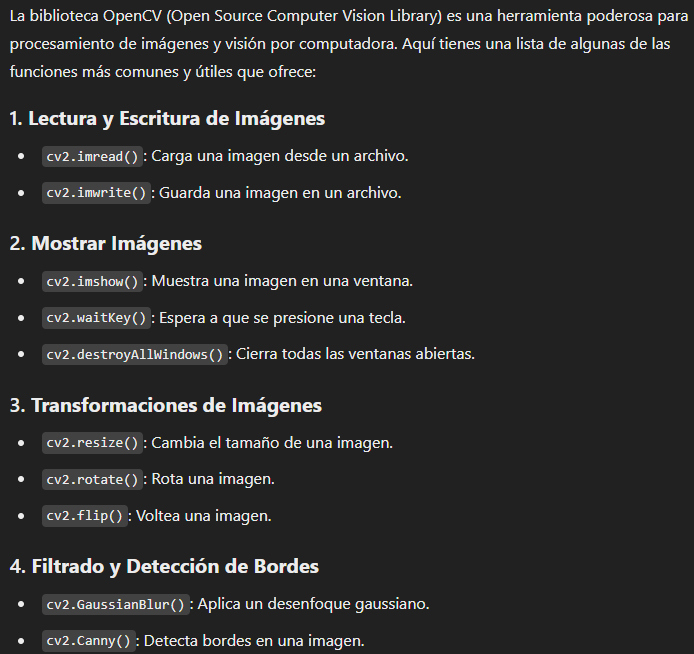
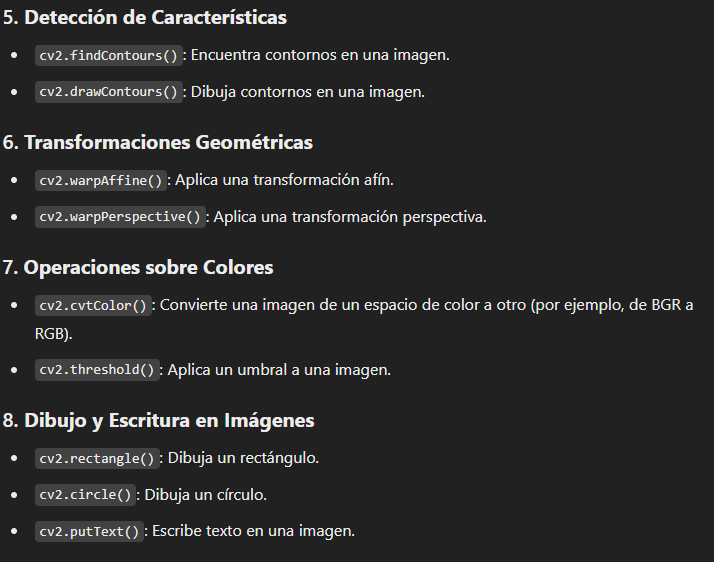
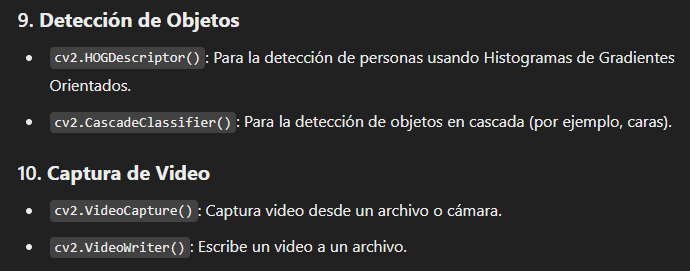

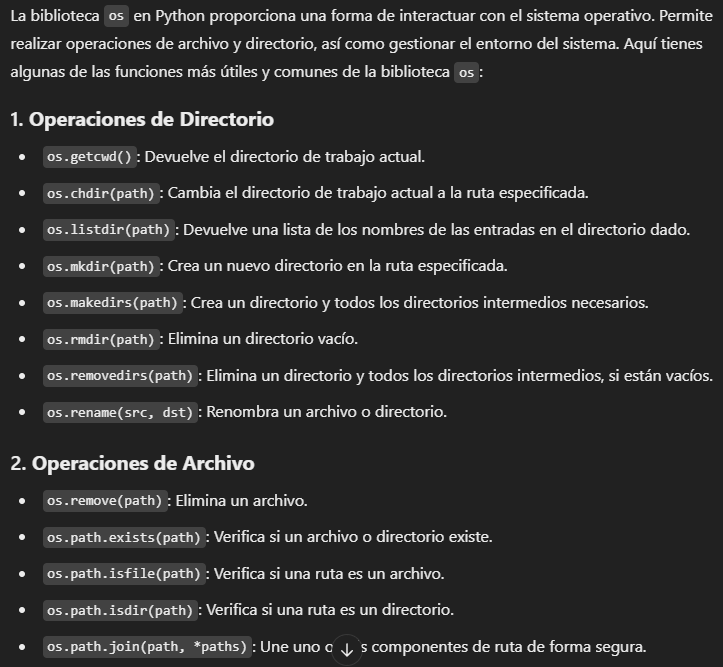
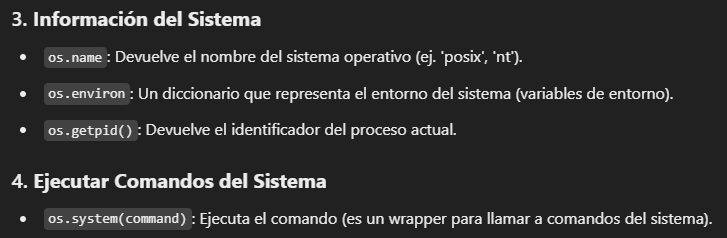